In [8]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import os,csv,datetime,warnings

import tensorflow as tf
import pandas as pd
import seaborn as sns

from sklearn import preprocessing as pp

from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,LSTM,Input,Dropout

from urllib.parse import urlencode
from urllib.request import urlretrieve
from IPython.display import Image

from astropy.io import fits
from astropy.utils.data import download_file 
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.coordinates import Galactic

import aplpy
from spectral_cube import SpectralCube
from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from reproject import reproject_interp

plt.style.use(astropy_mpl_style)
%matplotlib inline

C:\Users\Jan\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
hi_data = download_file(
    'http://cdsarc.u-strasbg.fr/vizier/ftp/cats/J/A+A/594/A116/CUBES/GAL/TAN/TAN_C14.fits',
    cache=True,show_progress=True
)

In [11]:
hi_c = fits.open(hi_data) 
cube = SpectralCube.read(hi_c)
hi_c.close()

In [12]:
print(cube)

SpectralCube with shape=(933, 277, 269) and unit=K:
 n_x:    269  type_x: GLON-TAN  unit_x: deg    range:   286.707162 deg:  320.913024 deg
 n_y:    277  type_y: GLAT-TAN  unit_y: deg    range:   -51.659734 deg:  -28.394756 deg
 n_s:    933  type_s: VRAD      unit_s: m / s  range:  -600207.218 m / s:  600409.133 m / s


INFO: Auto-setting vmin to -1.650e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.772e-01 [aplpy.core]


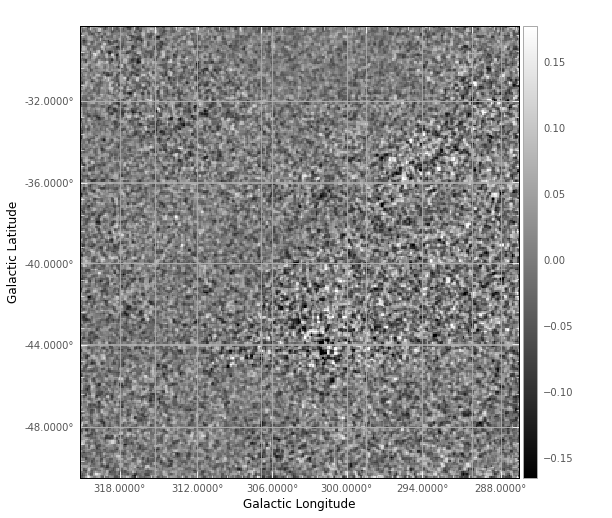

In [21]:
cube[100,:,:].quicklook()